In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Ads_CTR_Optimisation.csv")

In [3]:
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [23]:
import math

N = 10000
d = 10
ads_selected = []
number_of_selected_adverts = [0] * d
sum_of_rewards = [0] * d
total_rewards = 0

for i in range(0, N):
  ad = 0
  max_upper_bound = 0
  for j in range(0, d):
    if (number_of_selected_adverts[j] > 0):
      average_reward = sum_of_rewards[j] / number_of_selected_adverts[j]
      delta_i = math.sqrt(3/2 * math.log(i + 1) / number_of_selected_adverts[j])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = j
  ads_selected.append(ad)
  number_of_selected_adverts[ad] += 1
  reward = data.values[i, ad]
  sum_of_rewards[ad] += reward
  total_reward += reward

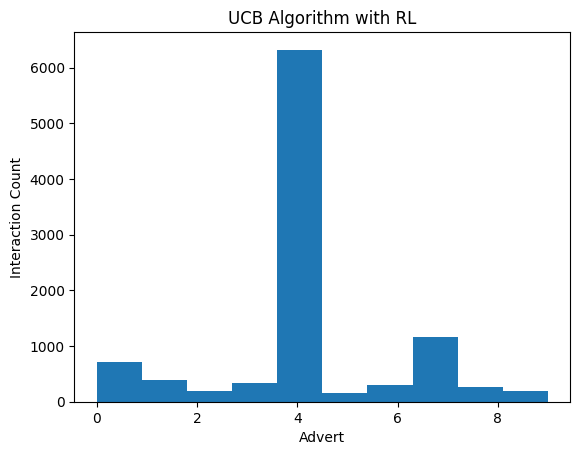

In [24]:
plt.hist(ads_selected)
plt.title("UCB Algorithm with RL")
plt.xlabel("Advert")
plt.ylabel("Interaction Count")
plt.show()